# Minor Project 4

## BUILD AN SVM CLASSIFIER FROM SCRATCH

Support Vector Machine is a type of supervised learning algorithm which is extremely
useful when we are dealing with datasets having more than 2 features, i.e., 3 or more
dimensional data. This algorithm is clean and accurate even when our model is trained
on complex non-linear data. After training, the algorithm creates a hyperplane where
each classification is done in such a way that each type of data is present on either side
of the hyperplane.

Here you are required to build an SVM Classifier from scratch based on the live
session conducted.

### Importing the libraries

In [1]:
from sklearn import datasets

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
cmap = ListedColormap(['#FF0000', '#00FF00'])

In [3]:
X, y = datasets.make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40)
y = np.where(y == 0, -1, 1)

In [4]:
y

array([ 1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1,
        1, -1,  1, -1,  1,  1, -1, -1,  1,  1,  1, -1, -1,  1,  1, -1])

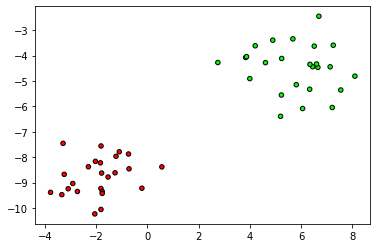

In [5]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolor='k', s=20)
plt.show()

SVM ALGORITHM - Classification Algorithm

In [6]:
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=10000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        y_ = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (
                        2 * self.lambda_param * self.w - np.dot(x_i, y_[idx])
                    )
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)


In [7]:
clf = SVM()
clf.fit(X, y)

In [8]:
print(clf.w, clf.b)

[0.45257302 0.25017548] -0.8350000000000006


In [9]:
def visualize_svm():
    def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

    x0_1 = np.amin(X[:, 0])
    x0_2 = np.amax(X[:, 0])

    x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
    x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

    x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
    x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

    x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
    x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])

    plt.show()    

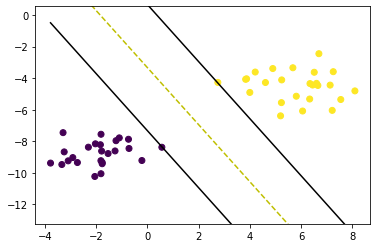

In [10]:
visualize_svm()